# MI PRIMER TRAIN-TEST-PREDICT

**TAREA: REGRESIÓN**<br>
**NIVEL: BEGINNER**

Vamos a REPETIR el ejercicio anterior pero en este caso el target será la TEMPERATURA a D+1, por lo que tendremos que EVALUAR el modelo con las métricas de Regresión.

# Librerias

In [ ]:
import pandas as pd     # Manejo de dataframes
import numpy as np      # Calculos matriciales
import matplotlib.pyplot as plt    # Visualizacion
import seaborn as sns              # Visualizacion
from google.colab import drive     # Drive en Colab
import pickle                     # Para guardar/descargar archivos comprimidos

pd.set_option('display.max_columns',None)   # para visualizar mas columnas en un df

import warnings
warnings.filterwarnings("ignore")  # inhabilita warnings

# Cargar dataset

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NUCLIO BCN/Compartida - ML SUPERVISADO/Notebooks/ML1 - Mi primer modelo/ML1-weather_traintest.csv',index_col=0)

In [ ]:
df.shape

(6812, 27)

In [ ]:
df.head()

,fecha,temperatura_max,temperatura_med,temperatura_min,rocio_max,rocio_med,rocio_min,humedad_max,humedad_med,humedad_min,presion_max,presion_med,presion_min,visibilidad_max,visibilidad_med,visibilidad_min,viento_max,viento_med,racha_viento_max,precipitacion,nubes,viento_dir,ind_lluvia,ind_nieve,ind_truenos,ind_niebla,ind_granizo
0,1997-01-01,7.0,4.0,2.0,5.0,3.0,2.0,100.0,95.0,76.0,1010,1008,1004,10.0,9.0,4.0,13,6,NaN,0.0,6.0,SW,0,0,0,0,0
1,1997-01-02,7.0,3.0,0.0,6.0,3.0,0.0,100.0,92.0,71.0,1007,1003,997,10.0,9.0,4.0,26,8,47.0,0.0,5.0,SE,1,0,0,0,0
2,1997-01-03,5.0,3.0,2.0,5.0,1.0,-1.0,100.0,85.0,70.0,1005,999,996,10.0,10.0,7.0,27,19,NaN,0.0,6.0,W,1,1,0,0,0
3,1997-01-04,7.0,3.0,-1.0,-2.0,-3.0,-4.0,86.0,63.0,49.0,1012,1010,1005,10.0,10.0,10.0,27,19,40.0,0.0,2.0,W,0,0,0,0,0
4,1997-01-05,2.0,0.0,-1.0,2.0,0.0,-3.0,100.0,95.0,86.0,1012,1008,1005,10.0,5.0,1.0,14,6,NaN,0.0,7.0,N,0,1,0,0,0


In [ ]:
df.fecha.min(), df.fecha.max()

('1997-01-01', '2015-12-31')

Tenemos un historico de 1997 hasta 2015 de todo el parte meteorologico diario. Como queremos construir un modelo capaz de predecir si llueve al dia siguiente (D+1), utilizaremos la funcion **shift()** para desplazar 1 fila (=1 dia) cada valor de **temperatura_med** en el dataset.

In [ ]:
df.set_index('fecha', inplace=True)

In [ ]:
df.sort_index(inplace=True)

In [ ]:
df['temperatura_D+1'] = df['temperatura_med'].shift(-1)

In [ ]:
df.head()

,temperatura_max,temperatura_med,temperatura_min,rocio_max,rocio_med,rocio_min,humedad_max,humedad_med,humedad_min,presion_max,presion_med,presion_min,visibilidad_max,visibilidad_med,visibilidad_min,viento_max,viento_med,racha_viento_max,precipitacion,nubes,viento_dir,ind_lluvia,ind_nieve,ind_truenos,ind_niebla,ind_granizo,temperatura_D+1
fecha,,,,,,,,,,,,,,,,,,,,,,,,,,,
1997-01-01,7.0,4.0,2.0,5.0,3.0,2.0,100.0,95.0,76.0,1010,1008,1004,10.0,9.0,4.0,13,6,NaN,0.0,6.0,SW,0,0,0,0,0,3.0
1997-01-02,7.0,3.0,0.0,6.0,3.0,0.0,100.0,92.0,71.0,1007,1003,997,10.0,9.0,4.0,26,8,47.0,0.0,5.0,SE,1,0,0,0,0,3.0
1997-01-03,5.0,3.0,2.0,5.0,1.0,-1.0,100.0,85.0,70.0,1005,999,996,10.0,10.0,7.0,27,19,NaN,0.0,6.0,W,1,1,0,0,0,3.0
1997-01-04,7.0,3.0,-1.0,-2.0,-3.0,-4.0,86.0,63.0,49.0,1012,1010,1005,10.0,10.0,10.0,27,19,40.0,0.0,2.0,W,0,0,0,0,0,0.0
1997-01-05,2.0,0.0,-1.0,2.0,0.0,-3.0,100.0,95.0,86.0,1012,1008,1005,10.0,5.0,1.0,14,6,NaN,0.0,7.0,N,0,1,0,0,0,3.0


# ML Preprocessing (express)

* Pulimos nulos y categóricos (type object), lo minimo para poder modelizar.
* **IMPORTANTE:** Obviaremos la parte de analisis exhaustivo de los datos (EDA), corrección de formatos, gestión de altas correlaciones y bajas varianzas para no demorarnos en el preprocessing pero son steps que se deben realizar para garantizar las condiciones óptimas en el entrenamiento.

## Imputar nulos

In [ ]:
df.isna().sum()

temperatura_max        2
temperatura_med        3
temperatura_min        2
rocio_max              2
rocio_med              2
rocio_min              2
humedad_max            2
humedad_med            2
humedad_min            2
presion_max            0
presion_med            0
presion_min            0
visibilidad_max      940
visibilidad_med      940
visibilidad_min      940
viento_max             0
viento_med             0
racha_viento_max    3306
precipitacion          0
nubes               1372
viento_dir             0
ind_lluvia             0
ind_nieve              0
ind_truenos            0
ind_niebla             0
ind_granizo            0
temperatura_D+1        4
dtype: int64

In [ ]:
#Eliminamos filas sin TARGET informado (seria contraproducente imputar valores al target del que queremos aprender!)
df.dropna(axis=0, subset=['temperatura_D+1'], inplace=True)

In [ ]:
# Parece que hay 3 registros sin la temperatura ni la humedad informada, como son MUY POCOS registros optamos por eliminarlos en lugar de imputar un valor (que dios nos perdone!)
df.dropna(axis=0, subset=['temperatura_med'], inplace=True)

In [ ]:
# imputamos la media de cada columna en los nulos restantes
cols_null = list(df.columns[df.isna().sum() >0])
cols_null

['visibilidad_max',
 'visibilidad_med',
 'visibilidad_min',
 'racha_viento_max',
 'nubes']

In [ ]:
for col in cols_null:
  df[col] = df[col].fillna(method='ffill')

In [ ]:
for col in cols_null:
  df[col] = df[col].fillna(method='bfill')

In [ ]:
print('Total nulos:',df.isna().sum().sum() )

Total nulos: 0


## Encoding categoricos

Para encodear categoricos 2  opciones:
* One-Hot-Encoding
* Ordinal Encoding (si tiene un sentido ordinal)

In [ ]:
categories = list(df.select_dtypes(include='object').columns)
print('Variables categoricas a encodear:', categories)

Variables categoricas a encodear: ['viento_dir']


In [ ]:
df = pd.get_dummies(df)

In [ ]:
categories = list(df.select_dtypes(include='object').columns)
print('Total categoricas:', len(categories))

Total categoricas: 0


In [ ]:
df.head(3)

,temperatura_max,temperatura_med,temperatura_min,rocio_max,rocio_med,rocio_min,humedad_max,humedad_med,humedad_min,presion_max,presion_med,presion_min,visibilidad_max,visibilidad_med,visibilidad_min,viento_max,viento_med,racha_viento_max,precipitacion,nubes,ind_lluvia,ind_nieve,ind_truenos,ind_niebla,ind_granizo,temperatura_D+1,viento_dir_E,viento_dir_N,viento_dir_NE,viento_dir_NW,viento_dir_S,viento_dir_SE,viento_dir_SW,viento_dir_W
fecha,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1997-01-01,7.0,4.0,2.0,5.0,3.0,2.0,100.0,95.0,76.0,1010,1008,1004,10.0,9.0,4.0,13,6,47.0,0.0,6.0,0,0,0,0,0,3.0,0,0,0,0,0,0,1,0
1997-01-02,7.0,3.0,0.0,6.0,3.0,0.0,100.0,92.0,71.0,1007,1003,997,10.0,9.0,4.0,26,8,47.0,0.0,5.0,1,0,0,0,0,3.0,0,0,0,0,0,1,0,0
1997-01-03,5.0,3.0,2.0,5.0,1.0,-1.0,100.0,85.0,70.0,1005,999,996,10.0,10.0,7.0,27,19,47.0,0.0,6.0,1,1,0,0,0,3.0,0,0,0,0,0,0,0,1


# MODEL

Ya tenemos los datos limpios (*clean data*) para poder modelizar. Vamos ahora a practicar un flujo simple de **TRAIN-TEST-PREDICT**:

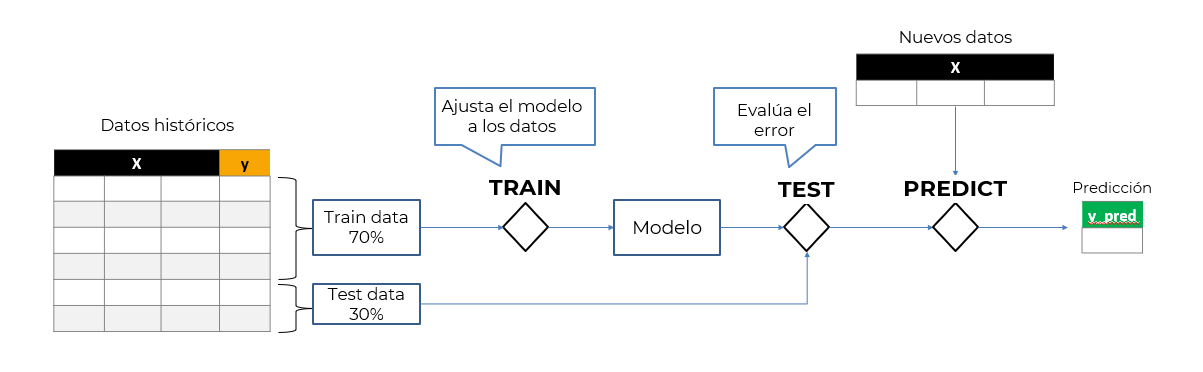

## Split X-y

In [ ]:
target = 'temperatura_D+1'

In [ ]:
features = [i for i in df.columns if i != target]

In [ ]:
y = df[target]
X = df[features]

## Target distribution

In [ ]:
y.describe()     # Distribucion

count    6806.000000
mean       14.657949
std         7.579795
min        -3.000000
25%         8.000000
50%        14.000000
75%        21.000000
max        32.000000
Name: temperatura_D+1, dtype: float64

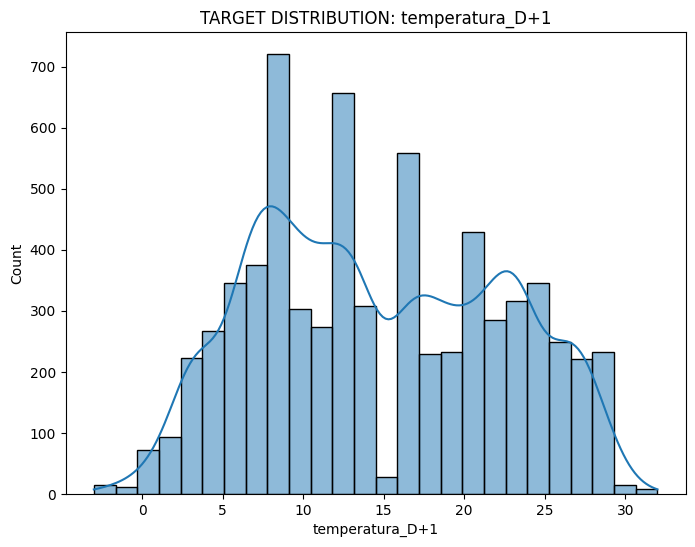

In [ ]:
plt.figure(figsize=[8,6])
sns.histplot(y,kde=True)
plt.title('TARGET DISTRIBUTION: '+target)
plt.show()

## Split data: Train-Test

Para separar los datos entre TRAIN-TEST tenemos 2 opciones:
* **HOLDOUT**, utilizaremos ultimos dias para TEST. La más coherente si el objetivo del modelo es hacer predicciones a futuro.
* **RANDOM HOLDOUT**, utilizando un set random de observaciones para TEST. Cuando el componente temporal en la prediccion no es importante.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# RANDOM HOLDOUT
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        test_size = 0.30,
                                        shuffle = True,
                                        random_state = 42 # Guarda el split en el seed 42 por si volvemos a ejecutar la celda, sea el mismo split
                                     )

In [ ]:
print('Train data instances:', len(y_train))
print('Test data instances:', len(y_test))

Train data instances: 4764
Test data instances: 2042


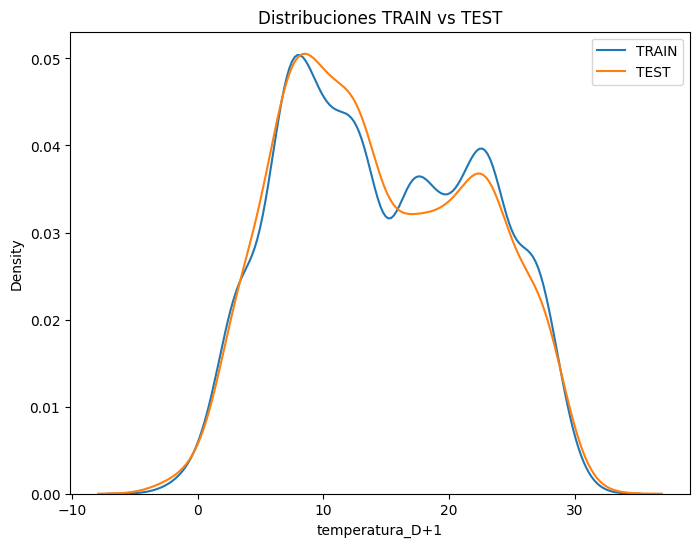

In [ ]:
plt.figure(figsize=[8,6])
sns.kdeplot(y_train,label='TRAIN')
sns.kdeplot(y_test,label='TEST')
plt.title('Distribuciones TRAIN vs TEST')
plt.legend()
plt.show()

## Rescaling

Esta vez SÍ vamos a estandarizar para implementar un modelo LINEAL.

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [ ]:
X_train_std = pd.DataFrame(X_train_std, columns = features)
X_test_std = pd.DataFrame(X_test_std, columns = features)

In [ ]:
X_train_std.head()

,temperatura_max,temperatura_med,temperatura_min,rocio_max,rocio_med,rocio_min,humedad_max,humedad_med,humedad_min,presion_max,presion_med,presion_min,visibilidad_max,visibilidad_med,visibilidad_min,viento_max,viento_med,racha_viento_max,precipitacion,nubes,ind_lluvia,ind_nieve,ind_truenos,ind_niebla,ind_granizo,viento_dir_E,viento_dir_N,viento_dir_NE,viento_dir_NW,viento_dir_S,viento_dir_SE,viento_dir_SW,viento_dir_W
0,1.566835,1.744210,1.643163,0.600426,0.211323,-0.098158,-2.008798,-1.673307,-1.172134,-0.561636,-0.457468,-0.314474,-0.480137,-0.275583,0.176920,0.410490,0.165479,-0.409071,-0.115652,-1.071387,-0.528135,-0.087259,-0.21951,-0.214205,-0.032414,-0.197586,-0.644461,-0.362755,-0.335506,-0.314179,-0.224713,-0.449914,2.425777
1,-1.355621,-1.142645,-0.975540,-0.028747,-0.214451,-0.098158,1.082666,1.886911,2.705282,-0.884682,-0.769388,-0.459756,-0.480137,-1.426559,-1.956870,-1.131599,-0.824401,0.843431,-0.115652,0.025912,-0.528135,-0.087259,-0.21951,4.668432,-0.032414,-0.197586,-0.644461,-0.362755,-0.335506,-0.314179,4.450112,-0.449914,-0.412239
2,0.780020,0.825666,0.770262,-0.028747,-0.427339,-0.300504,-1.722551,-1.317285,-0.965339,-0.400112,-0.301509,-0.023909,-0.480137,-0.275583,0.176920,-0.617569,0.165479,-0.957041,-0.115652,-1.071387,-0.528135,-0.087259,-0.21951,-0.214205,-0.032414,-0.197586,1.551685,-0.362755,-0.335506,-0.314179,-0.224713,-0.449914,-0.412239
3,-0.906012,-0.880203,-0.975540,-0.238471,-0.640226,-0.705196,1.082666,0.615405,0.585628,1.699689,1.570007,1.574199,2.052011,1.259051,0.176920,-0.617569,-0.230473,-0.330790,-0.115652,0.574562,-0.528135,-0.087259,-0.21951,-0.214205,-0.032414,-0.197586,-0.644461,-0.362755,-0.335506,3.182898,-0.224713,-0.449914,-0.412239
4,-0.906012,-0.748983,-0.684573,-0.028747,-0.214451,0.104189,1.082666,0.767986,0.223735,-1.530775,-2.328984,-2.348429,2.052011,-0.083754,-0.249838,1.746967,0.165479,1.313119,7.526921,1.671861,1.893457,-0.087259,-0.21951,-0.214205,-0.032414,5.061079,-0.644461,-0.362755,-0.335506,-0.314179,-0.224713,-0.449914,-0.412239


A modo didactico, vamos a comprobar que hace la estandarizacion en nuestros datos:

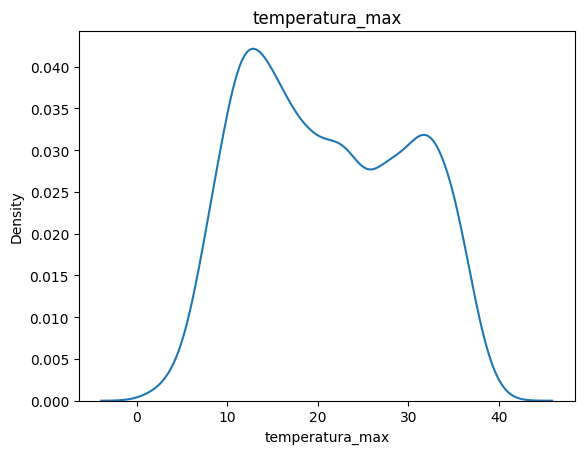

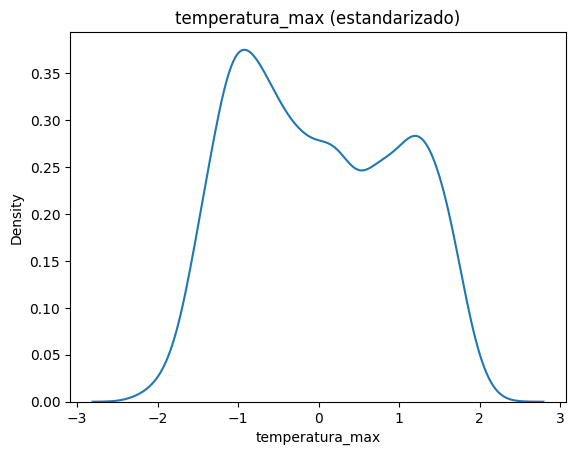

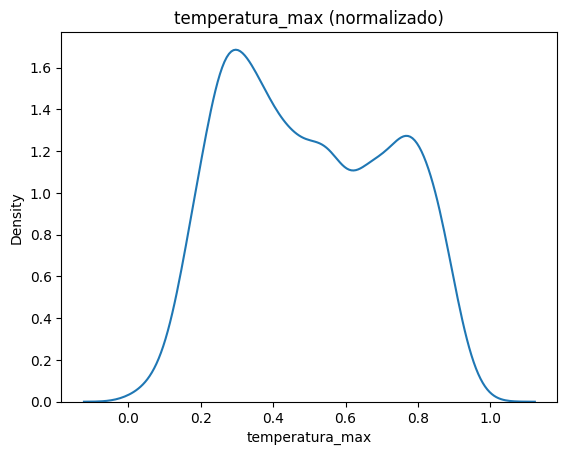

In [ ]:
sns.kdeplot(X_train['temperatura_max'])
plt.title('temperatura_max')
plt.show()

sns.kdeplot(X_train_std['temperatura_max'])
plt.title('temperatura_max (estandarizado)')
plt.show()

X_train_norm = pd.DataFrame(data=MinMaxScaler().fit_transform(X_train), columns=X_train.columns)
sns.kdeplot(X_train_norm['temperatura_max'])
plt.title('temperatura_max (normalizado)')
plt.show()

In [ ]:
# Guarda scaler
pickle.dump(scaler, open('/content/drive/MyDrive/Colab Notebooks/NUCLIO BCN/Compartida - ML SUPERVISADO/Notebooks/ML1 - Mi primer modelo/scaler.pkl', 'wb'))

## TRAIN

Vamos a utilizar Ridge(), un modelo lineal, para generar un modelo de REGRESIÓN entrenando con el **TRAIN DATA ESTANDARIZADO**. Veremos más adelante como funcionan los distintos algoritmos ML.

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
model = Ridge()                       # declara el algoritmo del modelo ML -> Algoritmo ML + Datos = Modelo ML

In [ ]:
model.fit(X_train_std, y_train)           # fit(): entrena el modelo ML con los datos de train

Ridge()

## TEST

Para evaluar el performance del modelo comparamos el dato real (y) con la prediccion (y_pred), a la hora de evaluar mediremos el performance en TRAIN y TEST:
* El error en TEST es el error que estimamos se producirá en el PREDICT.
* La comparativa TRAIN vs TEST nos ayuda a identificar posible OVERFITTING en el ajuste.<br><br>
Las principales métricas de **EVALUACIÓN en REGRESIÓN** son:
* **RMSE**, MAE, MSE
* Distribucion del error

In [ ]:
y_train_pred = model.predict(X_train_std)                        # predicciones del modelo en los datos de TRAIN
y_test_pred = model.predict(X_test_std)                          # predicciones del modelo en los datos de TEST

* **RMSE, MAE y MAPE**

In [ ]:
error = y_test_pred - y_test.values

In [ ]:
error

array([ 3.86386993, -0.71070012, -0.03002113, ..., -1.26783274,
        1.9466863 , -0.96140371])

In [ ]:
mae = np.mean(np.abs(error))
mse = np.mean(error**2)
rmse = np.sqrt(np.mean(error**2))

In [ ]:
print('MAE:', round(mae,4))
print('MSE:', round(mse,4))
print('RMSE:', round(rmse,4))

MAE: 1.4178
MSE: 3.3389
RMSE: 1.8273


In [ ]:
# directamente en sklearn...
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2 = r2_score(y_train, y_train_pred)

print('TRAIN')
print('MAE:', round(mae,4))
print('MSE:', round(mse,4))
print('RMSE:', round(rmse,4))
print('R2-score',round(r2,4))

mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2 = r2_score(y_test, y_test_pred)

print()
print('TEST')
print('MAE:', round(mae,4))
print('MSE:', round(mse,4))
print('RMSE:', round(rmse,4))
print('R2-score',round(r2,4))

TRAIN
MAE: 1.3975
MSE: 3.2239
RMSE: 1.7955
R2-score 0.9441

TEST
MAE: 1.4178
MSE: 3.3389
RMSE: 1.8273
R2-score 0.9412


* **Distribución del error e intervalos de confianza**

In [ ]:
pd.Series(error).describe()

count    2042.000000
mean        0.137474
std         1.822528
min        -5.995544
25%        -1.022633
50%         0.147190
75%         1.253236
max         9.146780
dtype: float64

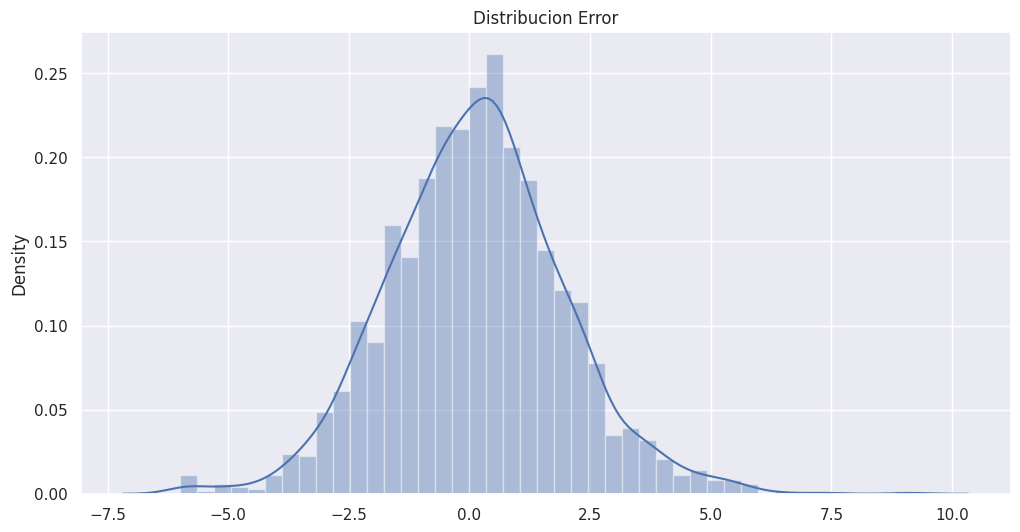

In [ ]:
sns.set(rc={'figure.figsize':(12,6)})
sns.distplot(error).set_title('Distribucion Error')
plt.show()

In [ ]:
confidence=95
z = (100-confidence)/2

print("Error medio absoluto (MAE):", round(np.mean(np.abs(error)),4))
print("Intervalo del error (confianza",confidence,"%):",round(np.percentile(error, 100-z),1),"/",round(np.percentile(error, z),1))

Error medio absoluto (MAE): 1.4178
Intervalo del error (confianza 95 %): 3.9 / -3.3


* **Comparativa Prediccion vs Valor real**

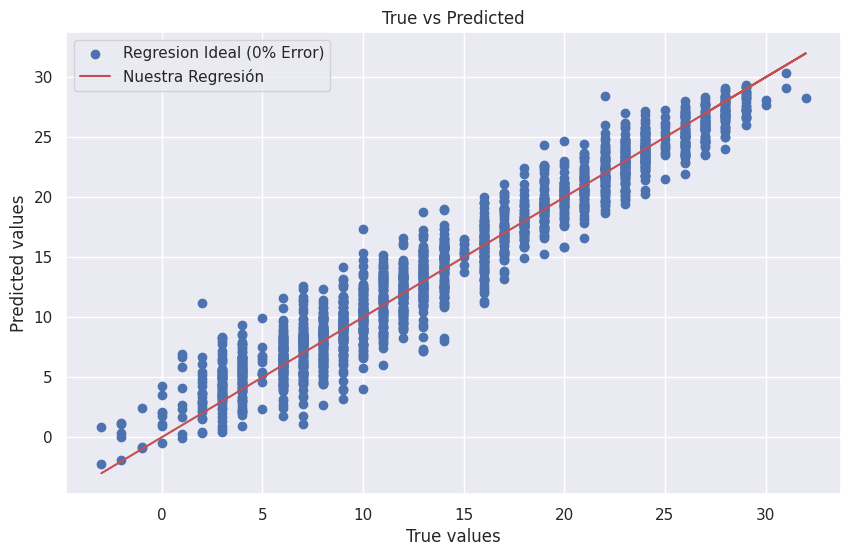

In [ ]:
#Compara Prediccion vs dato real
plt.figure(figsize=[10,6])
plt.scatter(y_test,y_test_pred)
plt.plot(y_test,y_test,'r')
plt.title('True vs Predicted')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.legend(['Regresion Ideal (0% Error)','Nuestra Regresión'])
plt.show()

## Interpretabilidad

* Además de la evaluación del performance del modelo, es importante interpretar cual es la definición del modelo tras entrenarse. Es crucial entender cuales son las variables más determinantes en el modelo a la hora de realizar una predicción.
* A la hora de interpretar un modelo utilizaremos:
  * SHAP values en modelos de ARBOLES DE DECISION
  * **Coeficientes** en modelos LINEALES

In [ ]:
coefficients = model.coef_

In [ ]:
top_features = pd.DataFrame({'feature': features, 'importance': coefficients})

In [ ]:
top_features = top_features.sort_values('importance', ascending=False).reset_index(drop=True)
top_features.head(10)

,feature,importance
0,temperatura_max,5.302087
1,humedad_min,1.533631
2,temperatura_min,0.965184
3,presion_med,0.612442
4,rocio_med,0.565446
5,rocio_max,0.394619
6,visibilidad_max,0.308969
7,temperatura_med,0.163070
8,nubes,0.162910
9,ind_lluvia,0.131420


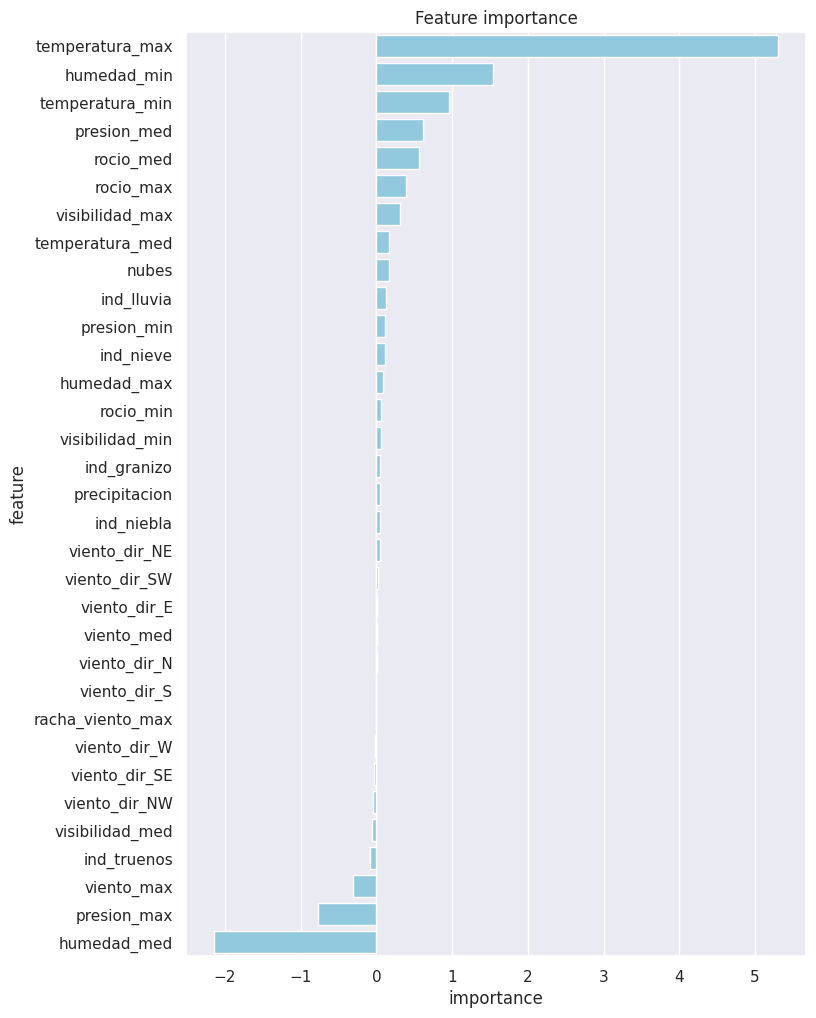

In [ ]:
plt.figure(figsize=[8,12])
sns.barplot(data=top_features, y='feature',x='importance',color='skyblue')
plt.title('Feature importance')
plt.show()

## Guarda modelo

In [ ]:
pickle.dump(model, open('/content/drive/MyDrive/Colab Notebooks/NUCLIO BCN/Compartida - ML SUPERVISADO/Notebooks/ML1 - Mi primer modelo/regressor.pkl', 'wb'))

# PREDICT

## Cargar nuevos datos

En la practica habria que aplicar de vuelta las mismas tecnicas de preprocessing aplicadas anteriormente para limpiar los nuevos datos. A modo didáctico, trabajaremos directamente con una muestra ya preprocesada para hacer el predict.

In [ ]:
sample_predict = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NUCLIO BCN/Compartida - ML SUPERVISADO/Notebooks/ML1 - Mi primer modelo/ML1-weather_predict.csv',index_col=0)
sample_predict.T

,2022-12-28
temperatura_max,15.00
temperatura_med,8.00
temperatura_min,2.00
rocio_max,8.00
rocio_med,4.00
rocio_min,1.00
humedad_max,100.00
humedad_med,78.00
humedad_min,34.00
presion_max,1031.00


## Rescaling

In [ ]:
# Carga scaler
scaler = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/NUCLIO BCN/Compartida - ML SUPERVISADO/Notebooks/ML1 - Mi primer modelo/scaler.pkl', 'rb'))

In [ ]:
sample_predict = scaler.transform(sample_predict)

In [ ]:
sample_predict

array([[-0.68120788, -0.88020318, -0.97553955, -0.02874683, -0.21445142,
        -0.09815751,  1.08266629,  1.02228678, -0.03475893,  1.69968915,
         1.4140469 ,  1.13835141,  2.05201125,  0.49173374, -0.24983799,
         0.51329589, -0.23047336,  0.06061713,  0.43254988,  2.22051123,
         1.89345664, -0.08725946, -0.21951041, -0.21420468, -0.03241359,
        -0.19758631, -0.64446084, -0.36275536, -0.33550592, -0.31417907,
        -0.22471346,  2.22264474, -0.41223908]])

## Cargar modelo

In [ ]:
model = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/NUCLIO BCN/Compartida - ML SUPERVISADO/Notebooks/ML1 - Mi primer modelo/regressor.pkl', 'rb'))

## ¿Qué temperatura hace mañana?

In [ ]:
predict = model.predict(sample_predict)[0]

In [ ]:
print('Temperatura mañana: {:.2}Cº'.format(predict))
print('Error medio absoluto (MAE): {:.2}Cº'.format(mae))

Temperatura mañana: 8.6Cº
Error medio absoluto (MAE): 1.4Cº
